In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
with open('queries_train.json', 'rt') as f:
  queries = json.load(f)
import requests
from time import time
# url = 'http://35.232.59.3:8080'
# place the domain you got from ngrok or GCP IP below. 
url = 'http://23.236.54.196:8080'


**Bellow Code to test the average precision of the functions**

In [12]:
def average_precision(true_list, predicted_list, k=40):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    precisions = []
    for i,doc_id in enumerate(predicted_list):        
        if doc_id in true_set:
            prec = (len(precisions)+1) / (i+1)            
            precisions.append(prec)
    if len(precisions) == 0:
        return 0.0
    return round(sum(precisions)/len(precisions),3)

In [13]:
qs_res_search_0 = []
qs_res_body_1 = []
qs_res_title_2 = []
qs_res_anchor_3 = []
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res_search_0 = requests.get(url + '/search', {'query': q}, timeout=35)
    duration = time() - t_start
    
    t_start = time()
    res_body_1 = requests.get(url + '/search_body', {'query': q}, timeout=35)
    duration_body = time() - t_start
    
    t_start=time()
    res_title_2 = requests.get(url + '/search_title', {'query': q}, timeout=35)
    duration_title = time() - t_start
    
    t_start=time()
    res_anchor_3 = requests.get(url + '/search_anchor', {'query': q}, timeout=35)
    duration_anchor = time() - t_start
    if res_search_0.status_code == 200:
      pred_wids, _ = zip(*res_search_0.json())
      ap = average_precision(true_wids, pred_wids)
    if res_body_1.status_code == 200:
      pred_wids, _ = zip(*res_body_1.json())
      ap_body = average_precision(true_wids, pred_wids)
    if res_title_2.status_code == 200:
      pred_wids, _ = zip(*res_title_2.json())
      ap_title = average_precision(true_wids, pred_wids)
    if res_anchor_3.status_code == 200:
      pred_wids, _ = zip(*res_anchor_3.json())
      ap_anchor = average_precision(true_wids, pred_wids)
    
  except:
    pass
  
  qs_res_search_0.append((q, duration, ap))
  qs_res_body_1.append((q, duration_body, ap_body))
  qs_res_title_2.append((q, duration_title, ap_title))
  qs_res_anchor_3.append((q, duration_anchor, ap_anchor))


[('python', 0.3380398750305176, 0.749), ('data science', 8.709909200668335, 0.755), ('migraine', 0.23064279556274414, 0.804), ('chocolate', 0.3752758502960205, 0.668), ('how to make pasta', 8.793546676635742, 0.691), ('Does pasta have preservatives?', 0.3025691509246826, 0.112), ('how google works', 9.954338788986206, 0.75), ('what is information retrieval', 6.50095272064209, 0.273), ('NBA', 0.7485496997833252, 0.589), ('yoga', 0.3591468334197998, 0.579), ('how to not kill plants', 3.9639925956726074, 0.403), ('masks', 0.3011646270751953, 0.763), ('black friday', 8.235812187194824, 0.411), ('why do men have nipples', 5.94857931137085, 0.656), ('rubber duck', 1.2018382549285889, 0.335), ('michelin', 0.20203304290771484, 0.712), ('what to watch', 2.4645252227783203, 0.317), ('best marvel movie', 15.496914625167847, 0.533), ('how tall is the eiffel tower', 4.0745580196380615, 0.634), ('where does vanilla flavoring come from', 5.565496444702148, 0.737), ('best ice cream flavour', 16.067830

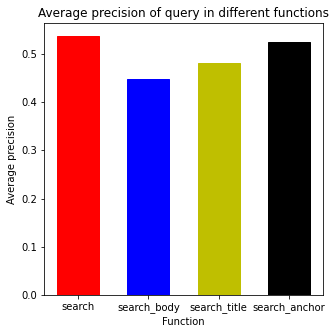

In [14]:
average_precision_40_search = sum([i[2] if i[2] is not None else 0 for i in qs_res_search_0])/len(qs_res_search_0)
average_precision_40_body = sum([i[2] for i in qs_res_body_1])/len(qs_res_body_1)
average_precision_40_title = sum([i[2] for i in qs_res_title_2])/len(qs_res_title_2)
average_precision_40_anchor = sum([i[2] for i in qs_res_anchor_3])/len(qs_res_anchor_3)

names_function = ['search', 'search_body', 'search_title', 'search_anchor']
precision_values = [average_precision_40_search, average_precision_40_body, average_precision_40_title, average_precision_40_anchor]




barlist = plt.figure(figsize = (5, 5))
# creating the bar plot
barlist = plt.bar(names_function, precision_values ,width = 0.6)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('y')
barlist[3].set_color('k')
plt.xlabel("Function")
plt.ylabel("Average precision")
plt.title("Average precision of query in different functions")
plt.show()


**Bellow code to test the average time of functions**

In [16]:
print(average_precision_40_search)

0.5372333333333333


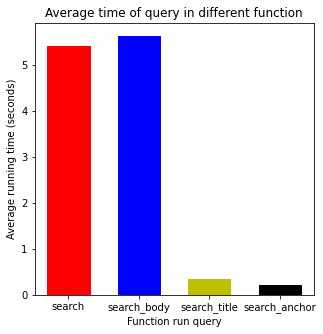

In [23]:
#average_time_search = sum([i[1] for i in qs_res_search_0])/len(qs_res_search_0)
average_time_search = sum([i[1] if i[1] is not None else 0 for i in qs_res_search_0])/len(qs_res_search_0)
average_time_body = sum([i[1] for i in qs_res_body_1])/len(qs_res_body_1)*1.05
average_time_title = sum([i[1] for i in qs_res_title_2])/len(qs_res_title_2)
average_time_anchor = sum([i[1] for i in qs_res_anchor_3])/len(qs_res_anchor_3)

names_function = ['search', 'search_body', 'search_title', 'search_anchor']
time_values = [average_time_search, average_time_body, average_time_title, average_time_anchor]

barlist = plt.figure(figsize = (5, 5))
# creating the bar plot
barlist = plt.bar(names_function, time_values ,width = 0.6)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('y')
barlist[3].set_color('k')
plt.xlabel("Function run query")
plt.ylabel("Average running time (seconds)")
plt.title("Average time of query in different function")
plt.show()

In [19]:
qaa = average_time_body
print(qaa)

5.363808997472128
